In [46]:
import matplotlib.pyplot as plt
import random
from __future__ import print_function
from pathlib import Path
from random import shuffle
import random

import argparse
import copy
import networkx as nx
import numpy as np
import sys
import tensorflow as tf
import igraph as ig

from deeplp.models.data_prep import create_weighted_graph, load_data
from deeplp.models.data_prep import prepare_data, random_unlabel, calc_masks
from deeplp.models.deeplp_att import DeepLP_ATT
from deeplp.models.deeplp_edge import DeepLP_Edge
from deeplp.models.deeplp_wrbf import DeepLP_WRBF
from deeplp.models.lp import LP
from deeplp.models.utils import accuracy, indices_to_vec
from deeplp.models.data_prep import select_features
from datasets import utils

color_list = {
    0: '#E97778',
    1: '#bf1a2f',
    2: '#454e9e',
    6: '#89C7B6',
    4: '#f7d002',
    5: '#41ead4',
    3: '#FFD57E'
}

In [126]:
np.random.seed(3)

In [180]:
true_labels, features, edge_features, node_features, graph \
= load_data('cora','linqs',directed=1,confidence=0)
U,D,B,R,node_features = utils.load_data('cora','linqs','datasets')
edges = np.array(B.edges())
sources,sinks = edges[:,0],edges[:,1]
labeled_indices, unlabeled_indices = \
        random_unlabel(true_labels,0.9,features,
                       seed=0,confidence=0)
rand_nodes = np.sort(np.random.choice(np.arange(true_labels.shape[0]),1700))
print(len(rand_nodes))
nodes_to_rem = []
for i in range(true_labels.shape[0]):
    if masterG.degree[i] > 10:
        nodes_to_rem.append(i)
nodes_to_rem = np.array(nodes_to_rem)
rand_nodes = np.setdiff1d(rand_nodes,nodes_to_rem)
print(len(rand_nodes))

-----------cora-----------
Loading labels...
Loading features...
Loading edge features...
Weights: Asymmetric
Loading graph...
Done!
1700
1171


In [181]:
masterG = nx.from_scipy_sparse_matrix(graph)
org=np.loadtxt('org.csv',delimiter=',')
opt=np.loadtxt('opt.csv',delimiter=',')
weights = org

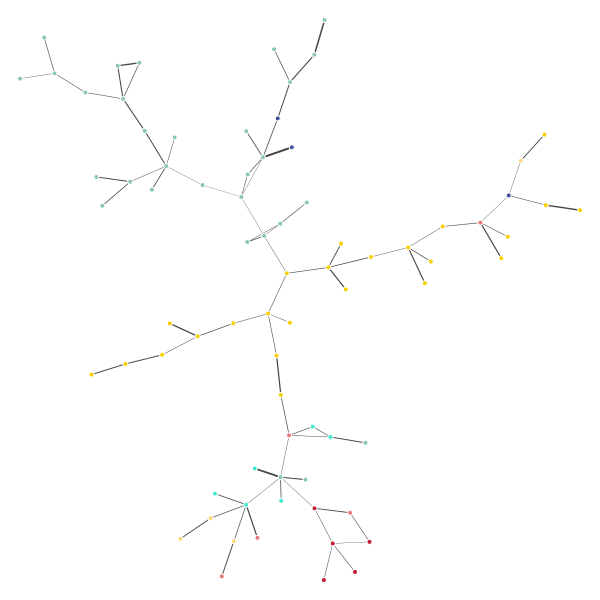

In [240]:
for edge,w in zip(edges,org):
    r,c = edge
    masterG[r][c]['weight'] += w/2
for i,label in enumerate(np.argmax(true_labels,axis=1)):
    masterG.node[i]['label'] = label
G = masterG.subgraph(rand_nodes)
Gsub = max(nx.connected_component_subgraphs(G), key=len)
mapping=dict(zip(Gsub.nodes(),range(0,len(Gsub))))
Gsub=nx.relabel_nodes(Gsub,mapping)
num_nodes = len(Gsub)
edge_list = np.array(list(zip(*nx.to_edgelist(Gsub)))[:2]).T.tolist()
edge_weights = [el['weight']-1 for el in list(zip(*nx.to_edgelist(Gsub)))[2]]
node_labels = [Gsub.node[i]['label'] for i in range(len(Gsub.nodes))]
node_colors = [color_list[label] for label in node_labels]
g1 = ig.Graph(num_nodes, edge_list)
g1['line_type'] = 2
layout = g1.layout()
ig.plot(g1,layout=layout, vertex_size=5, vertex_color=node_colors, edge_width=np.array(edge_weights)/10,vertex_frame_color='white',lty=3)

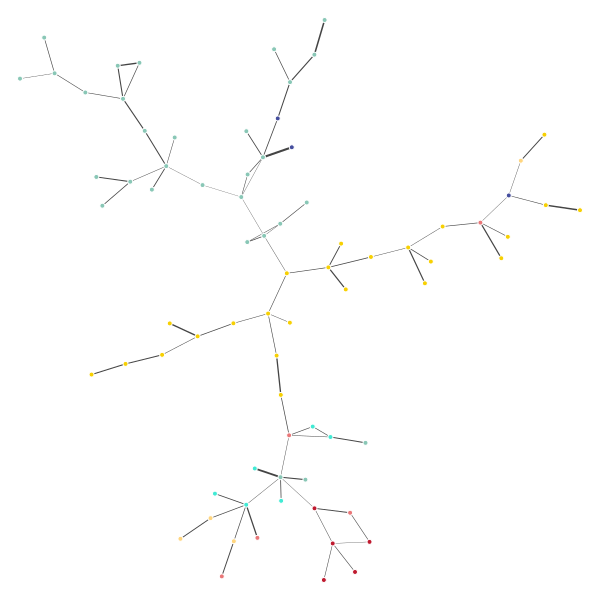

In [242]:
for edge,w in zip(edges,opt):
    r,c = edge
    masterG[r][c]['weight'] += w/2
for i,label in enumerate(np.argmax(true_labels,axis=1)):
    masterG.node[i]['label'] = label
G = masterG.subgraph(rand_nodes)
Gsub = max(nx.connected_component_subgraphs(G), key=len)
mapping=dict(zip(Gsub.nodes(),range(0,len(Gsub))))
Gsub=nx.relabel_nodes(Gsub,mapping)
num_nodes = len(Gsub)
edge_list = np.array(list(zip(*nx.to_edgelist(Gsub)))[:2]).T.tolist()
edge_weights = [el['weight']-1 for el in list(zip(*nx.to_edgelist(Gsub)))[2]]
node_labels = [Gsub.node[i]['label'] for i in range(len(Gsub.nodes))]
node_colors = [color_list[label] for label in node_labels]
g1 = ig.Graph(num_nodes, edge_list)
g1['line_type'] = 2
# layout = g1.layout()
ig.plot(g1,layout=layout, vertex_size=5, vertex_color=node_colors, edge_width=np.array(edge_weights)/10,vertex_frame_color='white',lty=3)

In [241]:
edge_weights

[9.68223458469839,
 9.10005605088601,
 3.8161242324584386,
 5.661303949397279,
 7.837885595996591,
 8.103079971279598,
 5.379175417229473,
 5.409974602098774,
 6.456951401678276,
 5.357668477289748,
 9.539203786954252,
 9.58247509913043,
 4.967590334351296,
 5.448362438936151,
 13.76113502279696,
 5.993447591976687,
 4.330176456538827,
 12.987481988840399,
 10.287678196340181,
 6.324529683859103,
 8.728737233023386,
 12.858728574531558,
 7.082631504603604,
 7.756746549447374,
 9.675365229008973,
 10.821254133840993,
 14.931650880605277,
 20.08449229469975,
 10.294905914376042,
 3.603384193959684,
 3.055638939865271,
 2.6991439563881316,
 3.3264927099666846,
 5.594085485810699,
 9.601954880374196,
 5.98450445804672,
 4.769568968795252,
 6.163060540246785,
 6.483012509619663,
 3.2647241089500856,
 8.299836948363362,
 6.825176403791145,
 8.917142682914182,
 12.28230217804161,
 6.9373383711074155,
 11.743706137617565,
 7.44074398468763,
 6.1314332347956935,
 7.549425419095336,
 10.57965473

In [243]:
edge_weights

[10.151125239655304,
 9.714349772441157,
 3.8279515037620255,
 5.912918799311177,
 8.100440681138961,
 8.517805681462399,
 5.6333433339765415,
 5.625685259541456,
 6.522230173346601,
 5.380192545473998,
 9.616232899376287,
 10.037114399006207,
 5.048674667830054,
 5.464795168307982,
 14.584154311767955,
 6.230606771782881,
 4.415439759853898,
 13.414265130103313,
 10.685917938674493,
 6.48517678155326,
 9.118556837741012,
 13.552832656607494,
 7.308721719546977,
 8.00771034222557,
 10.143274547438827,
 11.167147581532564,
 15.350458149263172,
 20.953705479656858,
 10.717987711667858,
 3.661010507382496,
 3.1302540265126915,
 2.7228311882531036,
 3.3731345256762104,
 5.7503834123550845,
 9.83080557757051,
 6.1251479520533945,
 4.8795073929088595,
 6.329212045996326,
 6.623442868136758,
 3.273970410228669,
 8.342670798129557,
 7.085915890047023,
 9.19102020904478,
 13.036916774904697,
 7.07124385269419,
 12.135664157277217,
 7.732278839643007,
 6.2359236969093645,
 7.713629050394669,
 11

In [234]:
opt -org

array([-0.18440514,  0.6208301 , -0.18472947, ...,  0.27441473,
       -0.2710253 , -0.00338942])